Author: Makhosetive Sibanda

Title: Career Path Analysis Project


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Maq\AppData\Local\Temp\ipykernel_11044\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


importing career path project dataset

In [126]:
career_path = pd.read_csv(r"C:\Users\Maq\Desktop\Career_Path_Analysis\Career_Path_Analysis_2023.csv")




In [49]:
career_path.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


01: Data cleaning

In [7]:
career_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [11]:
career_path.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [13]:
career_path.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [127]:
career_path['salary'] = career_path['salary'].astype(float)
career_path['salary_in_usd'] = career_path['salary_in_usd'].astype(float)
career_path['job_title'] = career_path['job_title'].astype('category')
career_path['job_category'] = career_path['job_category'].astype('category')
career_path['salary_currency'] = career_path['salary_currency'].astype('category')
career_path['employee_residence'] = career_path['employee_residence'].astype('category')
career_path['experience_level'] = career_path['experience_level'].astype('category')
career_path['employment_type'] = career_path['employment_type'].astype('category')
career_path['work_setting'] = career_path['work_setting'].astype('category')
career_path['company_location'] = career_path['company_location'].astype('category')
career_path['company_size'] = career_path['company_size'].astype('category')




In [18]:
career_path.dtypes

work_year                int64
job_title             category
job_category          category
salary_currency       category
salary                 float64
salary_in_usd          float64
employee_residence    category
experience_level      category
employment_type       category
work_setting          category
company_location      category
company_size          category
dtype: object

In [19]:
career_path.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [22]:
duplicates = career_path.duplicated()

In [23]:
career_path

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000.0,165000.0,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000.0,412000.0,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000.0,151000.0,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000.0,105000.0,United States,Entry-level,Full-time,Remote,United States,S


Career path  data analysis querying

01: Salary Insights analysis

In [18]:

#Average salary across all job  titles paid in USD
average_USD_salary = career_path["salary_in_usd"].mean()
print(f"Average Salary: ${average_USD_salary:.2f}")


Average Salary: $150299.50


In [27]:
#Highest Average salary by Job title
highest_salary_by_job_title = career_path.groupby("job_title")["salary_in_usd"].mean()
highest_salary_title = highest_salary_by_job_title.idxmax()
highest_salary_value = highest_salary_by_job_title.max()
print(f"Job Title with Highest Average Salary is: {highest_salary_title}, with a Salary of: ${highest_salary_value:.2f}")


Job Title with Highest Average Salary is: Analytics Engineering Manager, with a Salary of: $399880.00


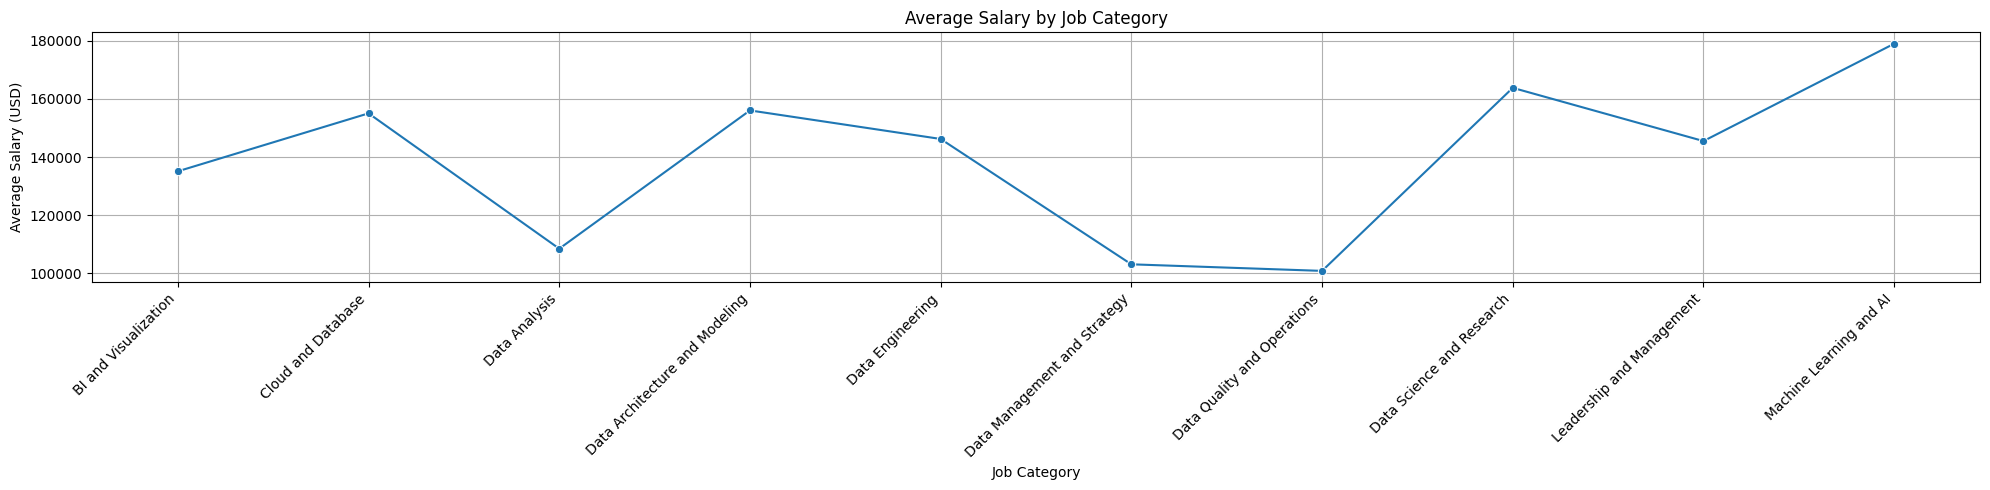

In [43]:
# Analysis by job category and calculate the average salary
average_salary_by_category = career_path.groupby('job_category')['salary_in_usd'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(20, 5))
sns.lineplot(x='job_category', y='salary_in_usd', data=average_salary_by_category, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Category')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Category')
plt.grid(True)
plt.tight_layout()
plt.show()

02: Job Distribution analysis

In [54]:
#Total number of unique job titles and category
unique_job_titles = career_path['job_title'].nunique()
unique_job_category = career_path['job_category'].nunique()
print(f"Unique Job Titles: {unique_job_titles}, Unique Job Categories: {unique_job_category}")

Unique Job Titles: 125, Unique Job Categories: 10


In [110]:
#Analysing the most common job titles and category
most_common_jobs_titles = career_path['job_title'].value_counts().head(5)
most_common_jobs_category = career_path['job_category'].value_counts().head(5)
print(f"Common job title is: {most_common_jobs_titles},\n And the most common job category is: {most_common_jobs_category}")

Common job title is: job_title
Data Engineer                2195
Data Scientist               1989
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
Name: count, dtype: int64,
 And the most common job category is: job_category
Data Science and Research    3014
Data Engineering             2260
Data Analysis                1457
Machine Learning and AI      1428
Leadership and Management     503
Name: count, dtype: int64


03: Location distribution Analysis

In [82]:
#Querying Average salary based on Company Location
average_salary_by_company_location = career_path.groupby("company_location")["salary_in_usd"].mean().head(10)
print(f"Average Salary by Location:\n{average_salary_by_company_location}")


Average Salary by Location:
company_location
Algeria                   100000.000000
American Samoa             50000.000000
Andorra                    50745.000000
Argentina                  62000.000000
Armenia                    50000.000000
Australia                 132282.708333
Austria                    71354.833333
Bahamas                    45555.000000
Belgium                    76864.750000
Bosnia and Herzegovina    120000.000000
Name: salary_in_usd, dtype: float64


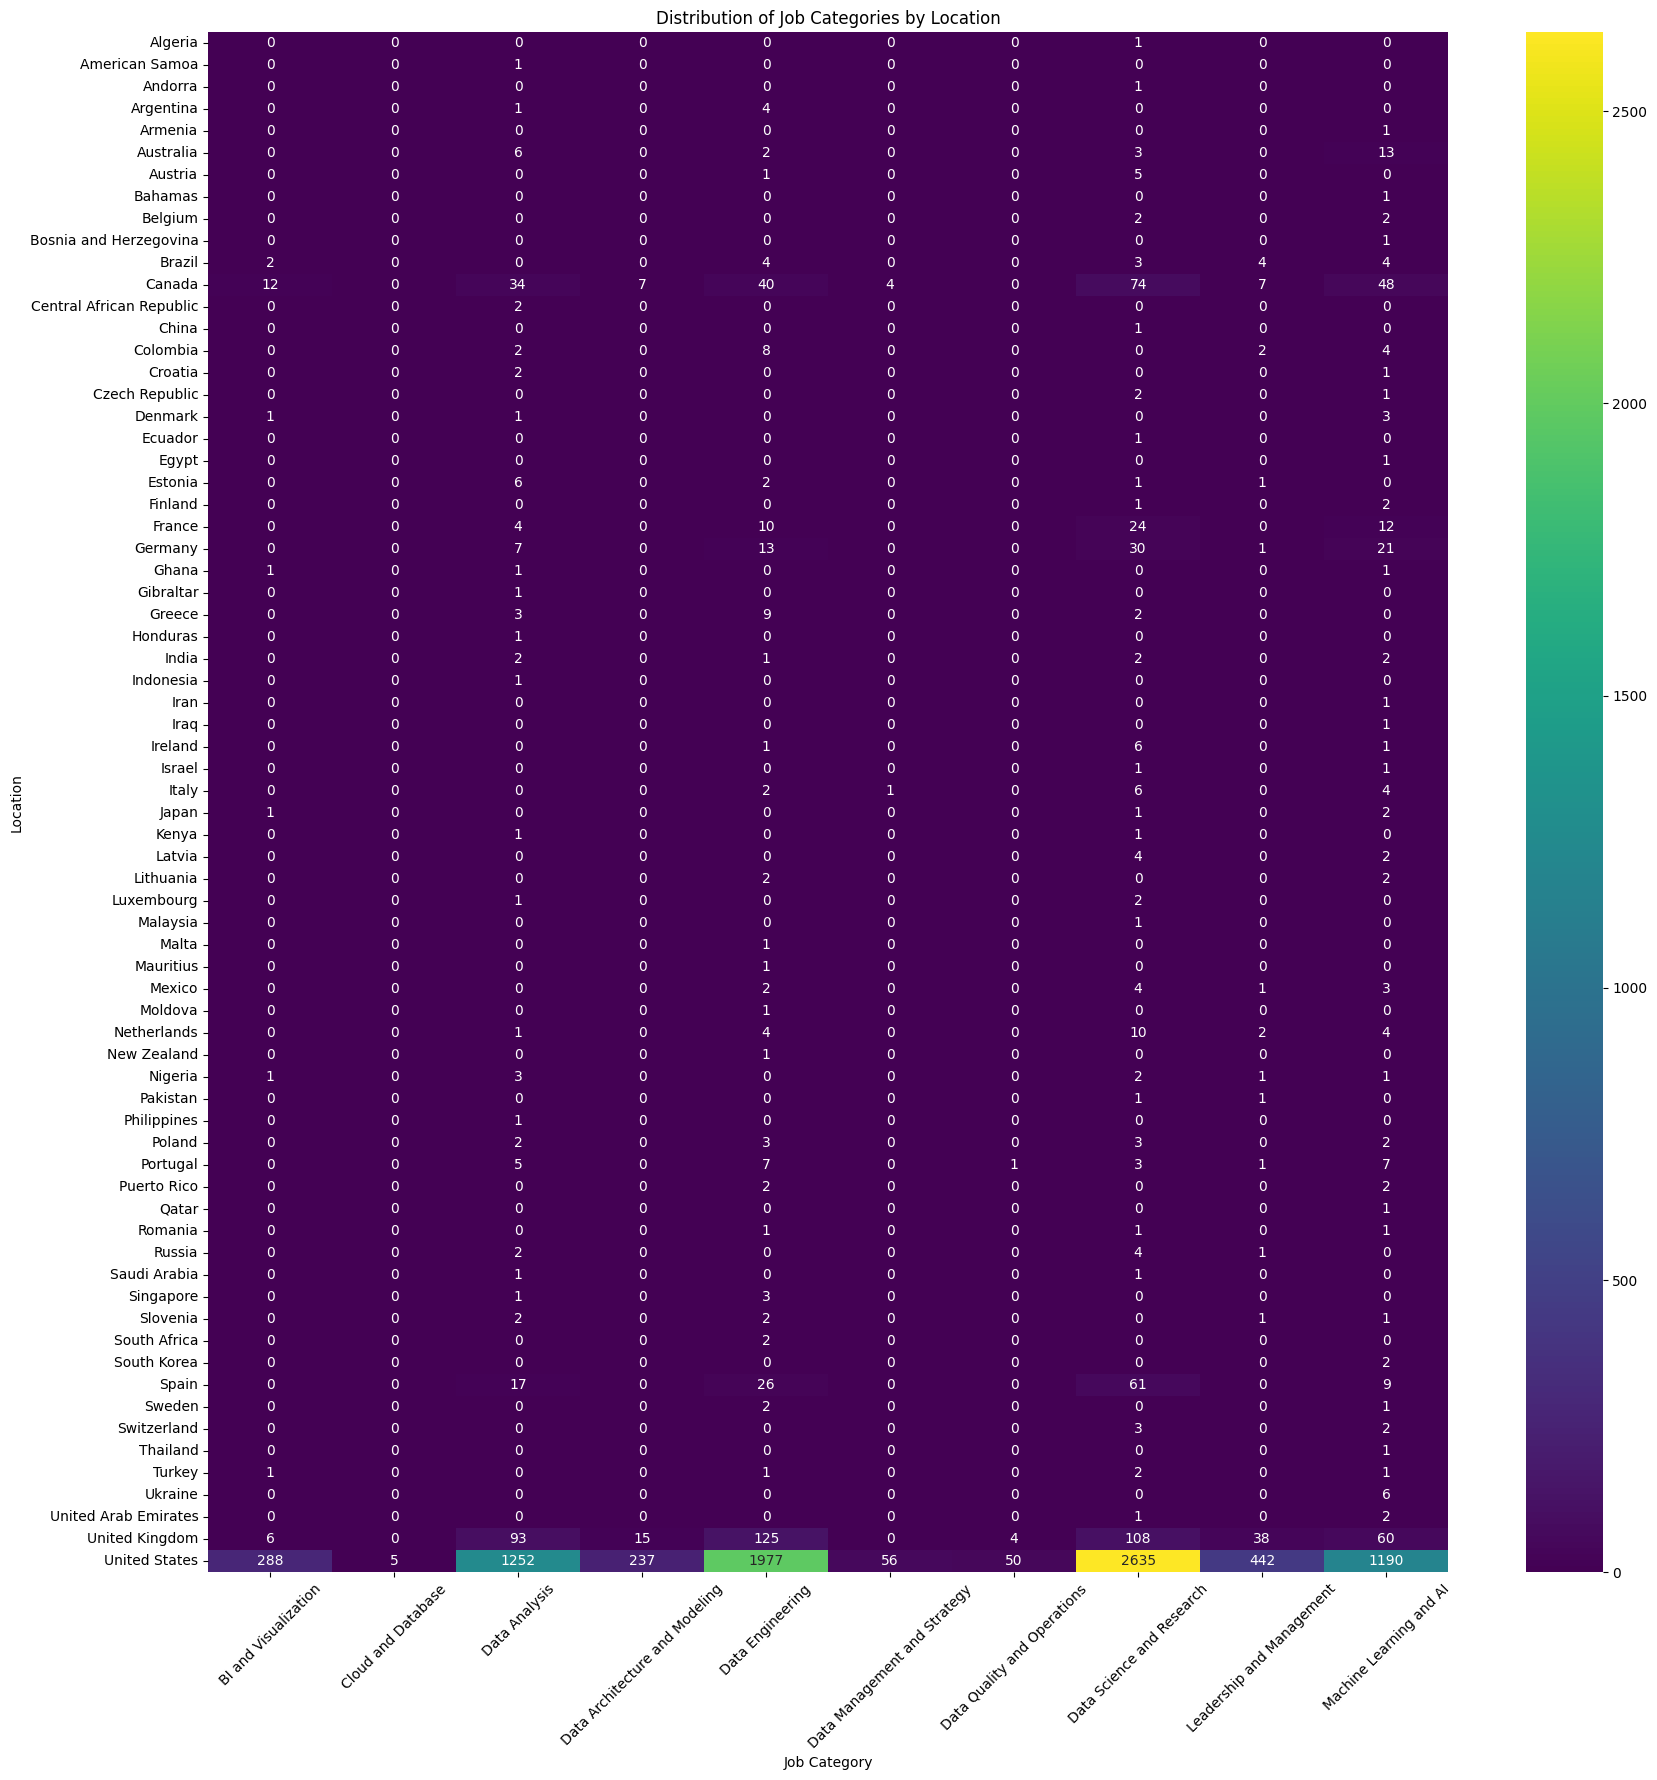

In [88]:
# Group by both 'company_location' and 'job_category', count occurrences, and unstack the result
category_distribution_by_location = career_path.groupby(['company_location', 'job_category']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(category_distribution_by_location, cmap='viridis', annot=True, fmt='d')
plt.title('Distribution of Job Categories by Location')
plt.xlabel('Job Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

04: Employment type and work setting analysis

In [106]:
#Analysing most common employment type
common_employment_type = career_path["employment_type"].value_counts()
print(f"The most common employment type is:/n {common_employment_type}")

the most common employment type is:/n employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64


the most common work settins is: work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64


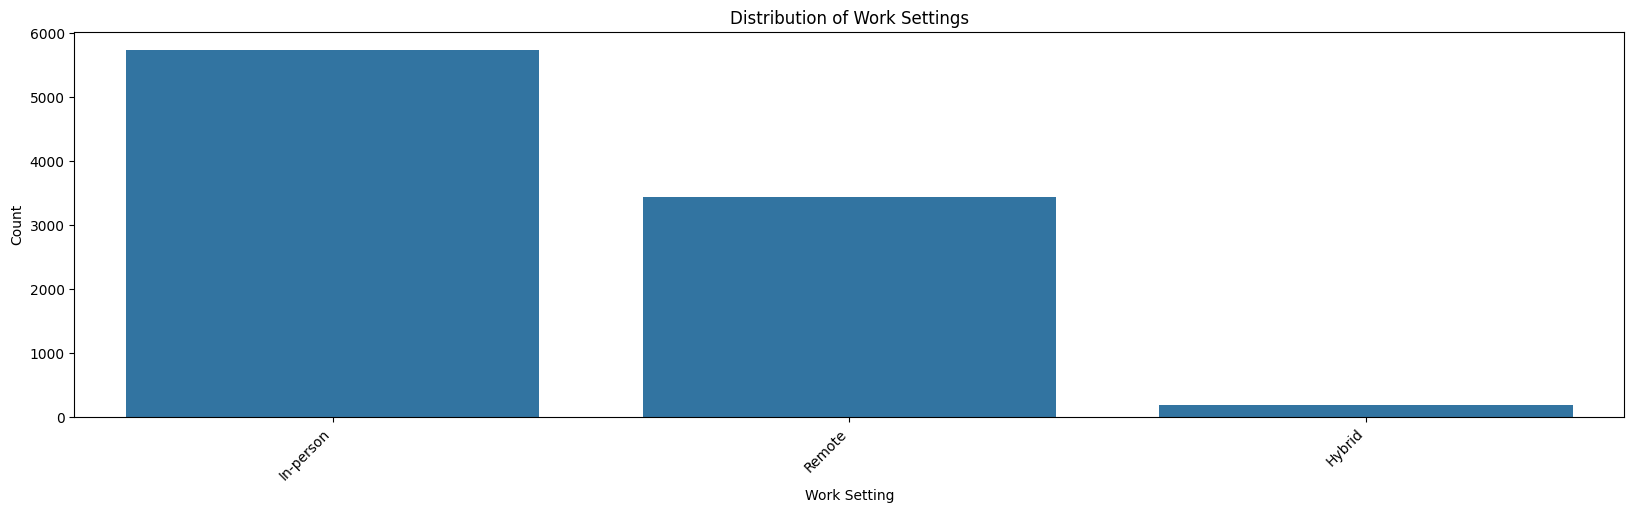

In [113]:
#Querying most common working setting
most_common_work_setting = career_path["work_setting"].value_counts()
print(f"the most common work settins is: {most_common_work_setting}")

# Create a bar plot
plt.figure(figsize=(20, 5))
sns.barplot(x=most_common_work_setting.index, y=most_common_work_setting.values)
plt.xlabel('Work Setting')
plt.ylabel('Count')
plt.title('Distribution of Work Settings')
plt.xticks(rotation=45, ha='right')
plt.show()

Salary Variation by Employment Type:
employment_type
Contract     117109.368421
Freelance     53868.636364
Full-time    150630.092052
Part-time     57866.066667
Name: salary_in_usd, dtype: float64


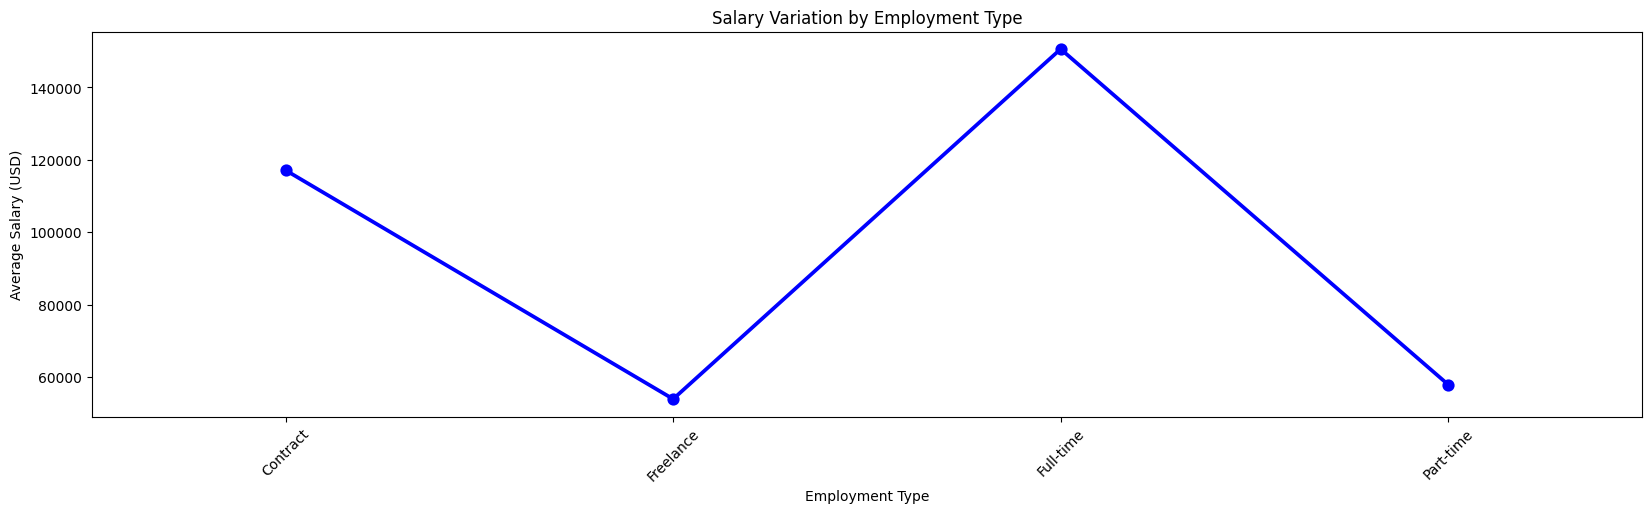

In [116]:
#Showcasing Salaries based on employment type
salary_by_employment_type = career_path.groupby('employment_type')['salary_in_usd'].mean()
print(f"Salary Variation by Employment Type:\n{salary_by_employment_type}")

# Plotting the point plot
plt.figure(figsize=(20, 5))
sns.pointplot(x=salary_by_employment_type.index, y=salary_by_employment_type.values, color='blue')

# Adding labels and title
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Salary Variation by Employment Type')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [119]:
#Analysing salary comparison based on company location
salary_comparison_by_location = career_path.groupby('company_location')['salary_in_usd'].mean()
print(f"Salary Comparison by Location:\n{salary_comparison_by_location}")

Salary Comparison by Location:
company_location
Algeria                 100000.000000
American Samoa           50000.000000
Andorra                  50745.000000
Argentina                62000.000000
Armenia                  50000.000000
                            ...      
Turkey                   22313.600000
Ukraine                 121333.333333
United Arab Emirates    100000.000000
United Kingdom          104447.233853
United States           158158.728234
Name: salary_in_usd, Length: 70, dtype: float64


In [122]:
#
remote_work_frequency = career_path['work_setting'].value_counts()
print(f"Frequency of Remote Work Settings:\n{remote_work_frequency}")

Frequency of Remote Work Settings:
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64


Average Salary Comparison by Work Setting:
work_setting
Hybrid        88912.287958
In-person    155524.120942
Remote       144996.016599
Name: salary_in_usd, dtype: float64


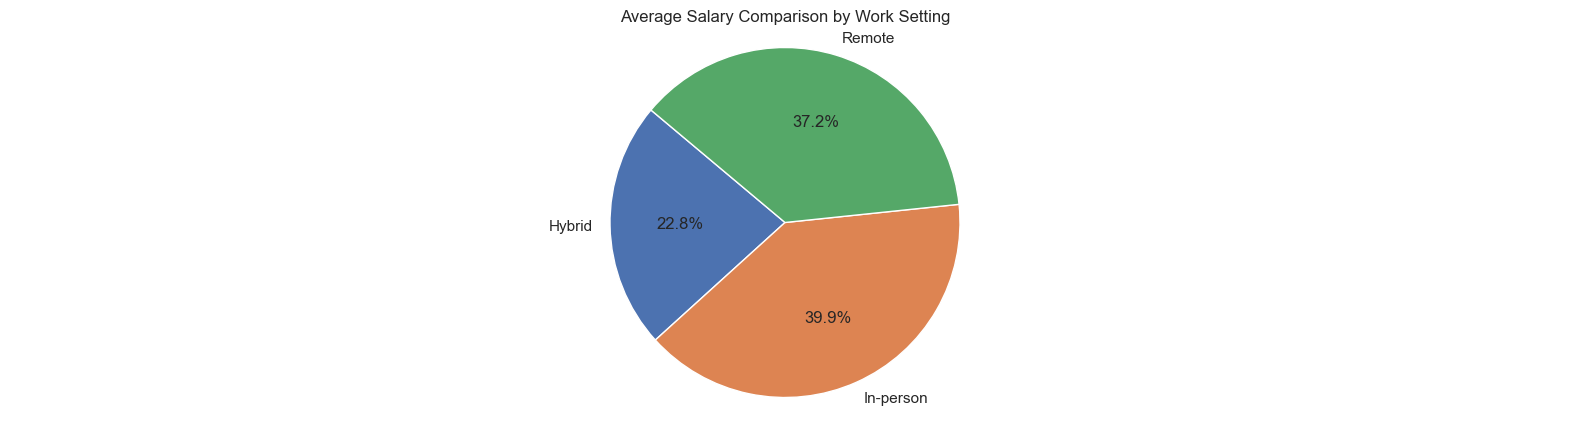

In [125]:
#
salary_by_work_setting = career_path.groupby('work_setting')['salary_in_usd'].mean()
print(f"Average Salary Comparison by Work Setting:\n{salary_by_work_setting}")

plt.figure(figsize=(20, 5))
plt.title('Average Salary Comparison by Work Setting')
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(salary_by_work_setting, labels=salary_by_work_setting.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()
